In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.special as special
import math

<img src = https://news.fnal.gov/wp-content/uploads/2021/04/Muon-g-2-results-plot.jpg >

# g-2 is exciting!!

The g-2 result is stated to be a 4.2 sigma (ie, 1 sigma = 1 standard deviation of the Gaussian as a proxy for significance) above the standard model prediction.  However, the folks who have been presenting the result have been not 100% careful with the language being used to describe the result:

[Link to the g-2 press release](https://news.fnal.gov/2021/04/first-results-from-fermilabs-muon-g-2-experiment-strengthen-evidence-of-new-physics/)

> “This quantity we measure reflects the interactions of the muon with everything else in the universe. But when the theorists calculate the same quantity, using all of the known forces and particles in the Standard Model, we don’t get the same answer,” said Renee Fatemi, a physicist at the University of Kentucky and the simulations manager for the Muon g-2 experiment. “This is strong evidence that the muon is sensitive to something that is not in our best theory.”

> The combined results from Fermilab and Brookhaven show a difference with theory at a significance of 4.2 sigma, a little shy of the 5 sigma (or standard deviations) that scientists require to claim a discovery but still compelling evidence of new physics. The chance that the results are a statistical fluctuation is about 1 in 40,000.

Granted, when we communicate with the general public we need have a primary goal to be clear and a secondary responsibility to be precise.  The precision that is missing is that the results, as presented, do not describe a hypothesis test.  The hypothesis test lies at the core of the scientific method and allows us to carefully formulate a hypothesis for how an experiment may yield results, and then calculate a degree of agreement between our results and our predictions.

This is in part why we are so excited by g-2, as the folklore of HEP has led us to reserve the word discovery for a "5 sigma result" and use the less dramatic word "evidence" for those results beyond 3 standard deviations.  To put this in context, a 1/2/3 standard deviation upward fluctuation of a Gaussian PDF would leave $15.86\%/2.275\%/0.135%\$ of the PDF above that value.  And beyond 5 standard deviations you're left with a fraction of 2.87E-7, or 1 part in ~3.5 million.

***
***
# So, hypothesis test?

Right, so if you want to do this correctly you form a hypothesis test and then calculate what's called a "p-value" to characterize the degree of agreement between expected and observed results.

<img src = https://upload.wikimedia.org/wikipedia/en/0/00/P-value_Graph.png >

Using this figure as a guide, a hypothesis test procedes as follows:

0. Define your hypothesis carefully.  We'll call our hypothesis H0 below to shorten the nomenclature, but the point is that the hypothesis cannot be wishy-washy.  It must precisely describe the prediction.

1. Before making an observation, we define a "critical region".  This should define a region in which sufficiently unlikely observations would fall such that you could conclude that H0 is unlikely to be true.  You can visualize this by the green shaded region, which covers the upper tail of the Gaussian.

2. This a priori definition of the critical region defines what we refer to as the significance of the test.  This is calculated by finding the fraction of the PDF $g(x|H0)$ that falls in the cricital region.  Often we assign the symbol $\alpha$ for this fraction.  

3. If the observed data falls in the critical region, we would then reject H0 as the source of the observed data and accept an alternative hypothesis as being more likely.  In this manner, H0 would be said to be rejected with a confidence level of $1-\alpha$. Note that we're not talking about upper limits, which is a different lecture.

A somewhat different formulation of this procedure can be thought of as a gauge of goodness-of-fit.  Rather than formally defining a hypothesis test via an a priori critical region selection, we instead simply calculate $\alpha_{obs}$ relative to the observed result (like in the picture above).  We can then infer that if we HAD defined the critical region to correspond to the region enclosing $\alpha_{obs}$ we would have rejected H0 at a confidence level of $1-\alpha_{obs}$.  We call this value $\alpha_{obs}$ the p-value of the hypothesis test.

A nuance of how we approach our interpretation of our hypothesis tests in HEP is that we're typically looking for ane excess of events above a background-only hypothesis, so our critical region corresponds to the upper tail of a distribution of the number of events.  We do not consider a downward fluctuation to be a significant sign of additional sources of events, so that means the fraction $\alpha$ only exists in the upper tail, forming a one-sided test.  If you were testing a coin by tossing it N times, you would consider both upward and downward fluctuations signficant evidence of an unfair coin.

The result of this is that when we convert our 1-sided hypothesis test to Gaussian standard deviation units, we must double the nominal fractions described above to maintain a consistent definition.  Thus, a 2 standard deviation excess above a background prediction requires that $2\times 2.275\% = 4.55\%$ of the H0 PDF lies in the critical region.  Said another way, a p-value of $4.55\%$ corresponds to a 2 standard deviation excess.

***
***
# What does this have to do with g-2?

In a nutshell, the g-2 result is quoted as the difference between a theoretical prediction and an experimental observation, divided by "one standard deviation" ($\Delta / \sigma$).  Thus, the $\Delta$ is converted to standard deviation units.  In this case, 4.2 standard deviations.  In the context of a p-value, we would need to have observed a p-value of 2.67E-5 or 1 part in 37465.  

So what has happened is that numbers have been manipulated in such a way that we have units of standard deviations, but no actual hypothesis test was performed.  The rest of this notebook explores the details.

***
# Let's look at the actual g-2 numbers:

There is a difference of roughly 2500 in 1.17 billion between the Standard Model prediction and the experimental results.  The uncertainty on each is roughly 400.  Very exciting!

In [2]:
# The glory of g-2 in all it's precision!

aSM      = 0.001165918100
stdSM    = 0.000000000430

aBNL     = 0.001165920924
stdBNL   = 0.000000000629 

aFNAL    = 0.001165920398
stdFNAL  = 0.000000000538

aWorld   = 0.001165920620
stdWorld = 0.000000000410


# And now without all those annoying digits!

aSM      = 18100
stdSM    = 430

aBNL     = 20924
stdBNL   = 629 

aFNAL    = 20398
stdFNAL  = 538

aWorld   = 20620
stdWorld = 410

***
# How is g-2 interpreting these numbers?

The g-2 folks have presented this result as a 4.2 standard deviation difference, potential evidence of new physics.  To get to this number (4.2 standard deviations), you have to make a few assumptions.  I challenge you to ask yourself if these assumptions are reasonable:

1. We will model all uncertainties as having a Gaussian PDF.  Even the theory uncertainty!  Ask yourself what a "reasonable" theory uncertainty (prior) might be.
2. We are only going to compare the difference between the central values of the Gaussian PDFs.  IE, 4.2 std dev = $(a_{expt} - a_{SM})/\sigma_{total}$ where the total uncertainty is the quadrature sum of theory and experimental uncertainty.
3. We will ignore any possible correlations between the FNAL and BNL experimental uncertainties.  Granted, they are statistics limited for the moment....so this isn't really too big of an issue.
4. We did not actually calculate a p-value to treat this problem as a hypothesis test. 

***
***

## Let's first reproduce the 4.2 sigma number

This is a good way to understand all the pieces of the puzzle.  First, let's remake their plot with distributions.

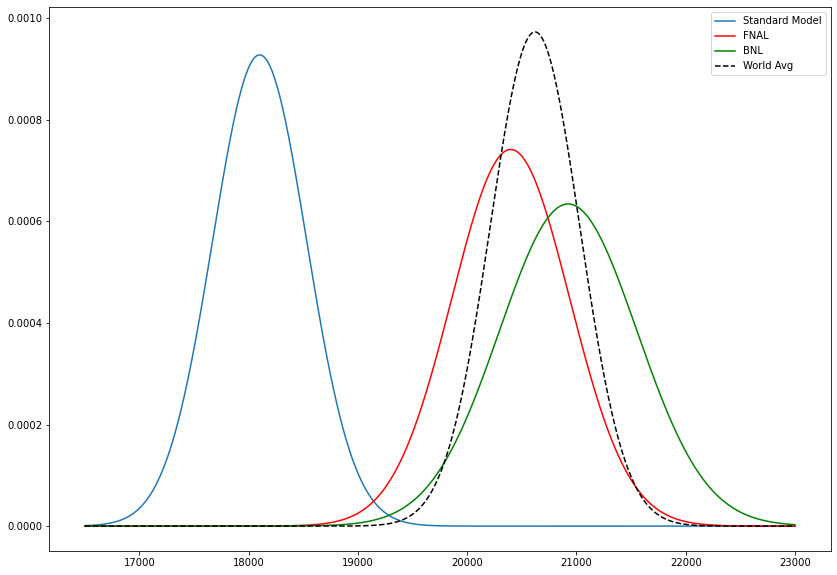

In [15]:
# Let's try to visualize this as a PDF

fig = plt.figure(figsize=(14,10))
x = np.linspace(16500,23000,100000)
plt.plot(x,stats.norm.pdf(x,aSM,stdSM),label="Standard Model")
plt.plot(x,stats.norm.pdf(x,aFNAL,stdFNAL),'r', label="FNAL")
plt.plot(x,stats.norm.pdf(x,aBNL,stdBNL),color='g',label="BNL")
plt.plot(x,stats.norm.pdf(x,aWorld,stdWorld),"k--",label="World Avg")
plt.legend()
plt.show()

***
***
# Significance:  What are we actually calculating??

So they are thinking of this as a purely Gaussian problem (is that ok?).  

Let's step through the numbers one by one to see if we agree with each of the steps.

First, let's think of these as absolute differences and in units of Gaussian standard deviations.  To get this right, we need to work out the correct divisor in the $(a_{expt} - a_{SM})/\sigma_{total}$ equation.  Clearly we do not succeed by using the individual uncertainties by themselves.

In [13]:
deltaSM_Avg = aWorld - aSM
print("Difference between world average and SM prediction (delta): ",deltaSM_Avg)
print("\nDelta in units of SM standard deviation: ",deltaSM_Avg/stdSM)
print("\nDelta in units of World Avg standard deviation: ",deltaSM_Avg/stdWorld)


Difference between world average and SM prediction (delta):  2520

Delta in units of SM standard deviation:  5.8604651162790695

Delta in units of World Avg standard deviation:  6.146341463414634


***
***
# But let's back up a step first!

Where did the "World Average" result come from?  

It is NOT the simple average between the results:

In [14]:
print(f"BNL : {aBNL} +\- {stdBNL}")
print(f"FNAL: {aFNAL} +\- {stdFNAL}")
print("\nAverage between BNL and FNAL: ", (aBNL + aFNAL)/2)
print("                 World Average: ",aWorld)

BNL : 20924 +\- 629
FNAL: 20398 +\- 538

Average between BNL and FNAL:  20661.0
                 World Average:  20620


# Clearly it's not a simple average

We need to include the measurement uncertainty in the calculation.  

Those who took PHY 950 will recall the Fisher Information matrix and how we use it for this kind of problem.

The Fisher Information matrix encodes our knowledge of a system, based on what can be drawn from the likelihood function.  It provides a lower bound for the covariance matrix for the system and makes the assumption that all covariance is gaussian in nature.

***

<div alighn='center'> $\LARGE J(x|\theta) = -{\partial^2 L(x;\theta) \over \partial \theta_i \partial \theta_j} \Bigr\rvert_{\theta=\hat{\theta}}$

***
    
<div alighn='center'> $\LARGE\mathcal{I}(\theta) = \mathbb{E}\left[J(x|\theta)\right]$

***
    
<div alighn='center'> $\LARGE V(\hat{\theta_i}) \ge \left( \mathcal{I}^{-1} \right)_{ii}$

In [6]:
# Sum measurements, but weight them by their relative information: info = 1/Variance = 1/sigma**2
worldAverage = (aFNAL/stdFNAL**2) + (aBNL/stdBNL**2)

# Normalize (ie, divide) by total posterior information
postInfo = (1/stdFNAL**2) + (1/stdBNL**2)
worldAverage /= postInfo

print(f"Proper World Average: {worldAverage} +\- {np.sqrt(1/postInfo)}")

Proper World Average: 20620.23161213572 +\- 408.84688362861465


***
***
# Whew, back on track!

So we have worked out the average of two experimental measurements.  And in the process we have learned something about how to view how new information increases our certainty (decreases uncertainty).

Now let's calculate the "significance" of the difference between the two values: SM and world average experiment.  We've already calculated the delta between them, but how do we convert that to 4.2 standard deviations?

A "simple" way of looking at this problem is to use your error propagation formula from back in 4th grade:

***

<div align="center"> $\LARGE f(x,y) = x - y$ 

***
    
<div align="center">$\Large { \sigma^2_f} = \left({\partial f \over \partial y}\right)^2 \sigma_y^2 + \left({\partial f \over \partial x}\right)^2 \sigma_x^2$

***
    
Using this formulation we can evaluate the "distance" between the two results in units of 1 standard deviation:

In [7]:
varF = (1)**2 * stdWorld**2 + (-1)**2 * stdSM**2

stdF = np.sqrt(varF)
realGM2Signif = deltaSM_Avg / stdF

print(f"Standard deviation of f(x,y) = x-y : {stdF}")
print(f"\nf(x,y) = x-y in units of one standard deviation: {realGM2Signif}")

Standard deviation of f(x,y) = x-y : 594.1380311005179

f(x,y) = x-y in units of one standard deviation: 4.241438635618429


***
***
# OK, but can we try to understand our 4th grade math better?

But what about the degree of agreement between our SM prediction and the world average experimental result?

Can we use probability theory to work out the joint probability that both are true?  In this case, the joint probability is just the intersection between the two outcomes:


<div align='center'> $\Large P(A \cap B) = P(A) \times P(B)$

    
This is easy enough to calculate by just multiplying the two Gaussian PDFs.  The joint overlap is very small, so it's been scaled up by 1E6 in the plot so you can see it.

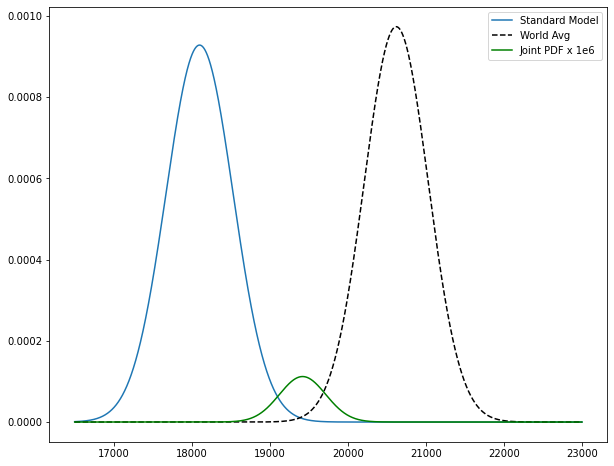

In [8]:
# Let's try to visualize this as a PDF

fig = plt.figure(figsize=(10,8))
plt.plot(x,stats.norm.pdf(x,aSM,stdSM),label="Standard Model")
plt.plot(x,stats.norm.pdf(x,aWorld,stdWorld),"k--",label="World Avg")
plt.plot(x,1e6*stats.norm.pdf(x,aWorld,stdWorld)*stats.norm.pdf(x,aSM,stdSM),"g",label="Joint PDF x 1e6")
plt.legend()
plt.show()

***
***

# How can I interpret this?

If we've done everything correctly, we should be able to just integrate this probability and that's the joint probability.

If you're not sure about doing this by hand, just go ask Wolfram Alpha or use Mathematica:

`integrate 1/sqrt(2*pi*4.3*4.3) exp(-(x-181)^2/(2*4.3*4.3)) *1/sqrt(2*pi*4.1*4.1) exp(-(x-206.2)^2/(2*4.1*4.1))  from 150 to 250`

and we get: 8.32889E-6

So we see that we find a p-value very close to what we expect, which turns into 4.31 standard deviations.  

In [33]:
# math magic to calculate 
jointInt = 8.32889E-6
print(f"Joint Gaussian integral: {jointInt}")

# Calculate pvalue in units of Gaussian standard deviation
signif = np.sqrt(2.0)*special.erfinv(1-2*jointInt)
print(f"Gaussian significance of this integral: {signif}")

# Prove that this calculation isn't crazy
pval =special.erfc(realGM2Signif/np.sqrt(2.0))/2.0
print("\nCompare to the g-2 'p-value':")
print(f"{realGM2Signif} sigma p-value: {pval}")

signif = np.sqrt(2.0)*special.erfinv(1-2*pval)
print(f"Signifcance of pvalue={pval}: {signif}")

Joint Gaussian integral: 8.32889e-06
Gaussian significance of this integral: 4.305541443136799

Compare to the g-2 'p-value':
4.241438635618429 sigma p-value: 1.1104580718544713e-05
Signifcance of pvalue=1.1104580718544713e-05: 4.241438635619073


***
***

# So, a hypothesis test then?

So what would a hypothesis test look like in this case?

We can build a simple example hypothesis test by defining two hypotheses.  First, we define H0 as an experiment that predicts 90 events and H1 that predicts 125 events.  So, this is like having a background process that defines H0 and then H1 is a "signal plus background" hypothesis that expects more events.

Repeated experimental results form a distribution of trials for each hypothesis.  These are simulated experiments, so we call these "pseudo-experiments" or "toy experiments".


(1000000, 2)


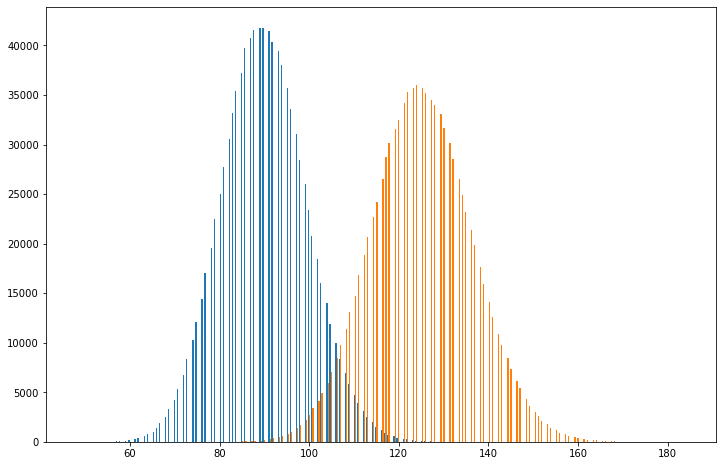

In [35]:
nH0 = 90

nH1 = nH0+35

fig = plt.figure(figsize=(12,8))
trialsH0 = np.random.poisson(nH0,1000000)
trialsH1 = np.random.poisson(nH1,1000000)
trials = np.vstack((trialsH0,trialsH1)).T
print(trials.shape)
plt.hist(trials,bins=200)
plt.show()


## From these distributions we can calculate a p-value

The p-value is defined as "the frequency of outcomes drawn from a given hypothesis that are at least as extreme as the observed outcome".  

As a proxy for H1, we can find the median value of the distribution of outcomes.  You can think of this as a likely outcome if we were to have an actual observation from a reality where H1 was true.  So this is typically taken as the "expected observation".  

To find the p-value, we just integrate the H0 trials that are equal to or greater than the H1 median value.  We need the "equal to or greater" to satisfy the definition of the p-value, particularly in this case because we have integer data.  

We integrate in the direction of larger values because this is what defines "extreme" in this instance.  We ignore downward fluctuations in H0 because those are not consistent with a hypothesis that has extra sources of events present, as we have in H1.

In [36]:
expPval = np.sum(trialsH0 >= 125)/len(trialsH0)
print("Median expected p-value: ", expPval)

signif = np.sqrt(2.0)*special.erfinv(1-2*expPval)
print(f"Signifcance of pvalue={expPval}: {signif}")

Median expected p-value:  0.000279
Signifcance of pvalue=0.000279: 3.451248278230325


***
***
# Nice toy example, but what about g-2?

Let me start by saying that I cannot actually calculate the PDF $g(x|H0)$ for g-2, with $H0$ being the standard model result.  I'm not even sure what $x$ would mean for them, as one would need a test statistic to represent their data.  That's what their army of well-trained PhD students and postdocs are presumably doing.  

However, they did a bunch of work to evaluate the impact of all of their systematic effects and the statistical component of their uncertainty.  I expect that if we use their Gaussian model, it's going to be close enough to the truth to not be concerned.  So we could use this to define $g(x|H1)$ where $H1$ can be an alternative model that magically reproduces the observed value of the anomalous muon magnetic moment $a_{H1}$.

And let's assume that if g-2 had observed the SM prediction, they would have reported $a_{H0}$ with the same experimental precision.

***
***

So let's build a hypothesis test!!  I'll define $H0$ as above, meaning the expected SM result.  This will have a Gaussian PDF: $g(x|H0) = \mathcal{N}(x|\mu=18100, \sigma=410)$.  For the hypothesis test we don't really need $g(x|H1)=\mathcal{N}(x|\mu=20620, \sigma=410)$, but it doesn't hurt to define it.



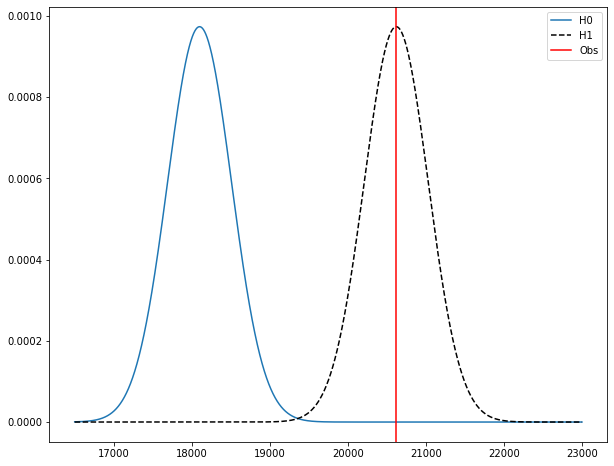

In [38]:
fig = plt.figure(figsize=(10,8))
plt.plot(x,stats.norm.pdf(x,aSM,stdWorld),label="H0")
plt.plot(x,stats.norm.pdf(x,aWorld,stdWorld),"k--",label="H1")
plt.axvline(aWorld,label="Obs",color='red')
plt.legend()
plt.show()

In [42]:
# Calculate p-values
pval =special.erfc(((aWorld-aSM)/stdWorld)/np.sqrt(2.0))/2.0
print("\nHypothesis test p-value :")
print(f"{(aWorld-aSM)/stdWorld} sigma p-value: {pval}")


Hypothesis test p-value :
6.146341463414634 sigma p-value: 3.964524768210377e-10


***
***
# But you already said this wasn't right!

No I did not, I said this was not what g-2 reported.  This is 6.15 standard deviations, not 4.24 standard deviations.

***
***
### So...?

Right, the g-2 folks folded in the theory prediction uncertainty which "watered down" their result to only 4.24 standard deviations.  

***
***
### So why didn't you do that, too?

Remember when I told you that the hypothesis test requires a STRICTLY DEFINED hypothesis? Nothing wishy-washy is the phrase I used.  The theory prediction is $a_{SM}$, which defined a hypothesis test.  I cannot define a realistic world in which the true value of the anomalous muon magnetic moment is  $a_{SM} \pm \sigma_{SM}$.  I can test other predictions, but I cannot form a hypothesis with a prior on this value.

***
***
### But the theorists are not 100% certain

That's fine, let's try another round.  This time I'll ask the "theorists" what the largest value their calculations could give within a reasonable interpretation of the hard work they've done.  But I'll ask two "theorists", one who says $a_{SM} + 1-\sigma_{SM}$ and a second, less confident one, who says $a_{SM} + 2-\sigma_{SM}$.  Each of these predictions defines a new hypothesis test and we can evaluate the p-value for each one!


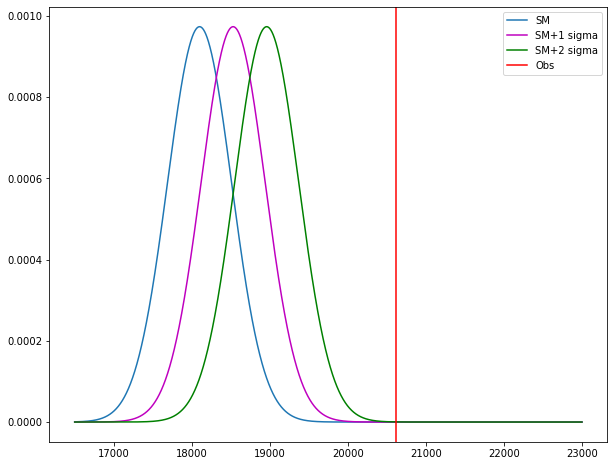

In [43]:
fig = plt.figure(figsize=(10,8))
plt.plot(x,stats.norm.pdf(x,aSM,stdWorld),label="SM")
plt.plot(x,stats.norm.pdf(x,aSM+stdSM,stdWorld),"m",label="SM+1 sigma")
plt.plot(x,stats.norm.pdf(x,aSM+2*stdSM,stdWorld),"g",label="SM+2 sigma")
plt.axvline(aWorld,label="Obs",color='red')
plt.legend()
plt.show()

In [49]:
# Calculate p-values
delta = (aWorld-(aSM))/stdWorld
pval =special.erfc((delta/np.sqrt(2.0)))/2.0
print("\nSM + 0 sigma :")
print(f"{delta} sigma p-value: {pval}")

delta = (aWorld-(aSM+stdSM))/stdWorld
pval =special.erfc((delta/np.sqrt(2.0)))/2.0
print("\nSM + 1 sigma :")
print(f"{delta} sigma p-value: {pval}")

delta = (aWorld-(aSM+2*stdSM))/stdWorld
pval =special.erfc((delta/np.sqrt(2.0)))/2.0
print("\nSM + 2 sigma :")
print(f"{delta} sigma p-value: {pval}")


SM + 0 sigma :
6.146341463414634 sigma p-value: 3.964524768210377e-10

SM + 1 sigma :
5.097560975609756 sigma p-value: 1.7202880472877208e-07

SM + 2 sigma :
4.048780487804878 sigma p-value: 2.5742602706224774e-05


***
***

# OK, I think you get it.

So from the strict definition of a hypothesis test, I would argue that the g-2 experiment is at least a 4.05 standard deviation excess.  I'd further go out on a limb to suggest that the true value is probably more than 4.2 standard deviations, depending on how you'd like to think about the PDF (prior) of the theory calculation.  Should it be flat or is Gaussian better?  Something else?  You're now in the realm of the best prognosticators out there if you want to try your hand.

But the bottom line is that g-2 is really exciting and we should be looking forward to new data!  What will happen?

1.  The observed FNAL result will change "a bit" when adding new data.  You're essentially averaging new data with old, so the old data will still drive part of the result.  So it cannot change by a LOT.
2.  The statistical uncertainty on the FNAL result will reduce and they will hopefully have also reduced systematic uncertainty.
3.  The BNL result will not change, so that will continue to pull up the "world average".
4.  The theory result will improve, but it's really hard to predict how that may go.
5.  Both theory and experimental groups could find errors in calculations, but that's not easy to speculate either.

So my guess is that the "significances" should probably go up.  This notebook will record my prediction for the next press conference.  Fun times for g-2 PhD students!